### Import libraries

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from skimage import io
import sys
import seaborn as sns

In [19]:
sys.path.insert(1, "/Users/k1801626/OneDrive - King's College London/git/AFT-Alignment_by_Fourier_Transform/Python_implementation/")
import AFT_tools as AFT       

### Import data (csv tracks and images)

In [2]:
input_folder = "/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/"

In [5]:
csv_list = glob.glob(input_folder+'*Spots.csv')

print(*csv_list, sep="\n")

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/merged_Spots.csv


In [12]:
image_list = glob.glob(input_folder+'ctrl/clahe*.tiff')

print(*image_list, sep="\n")

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/ctrl/clahe_Position 6.tiff


### Load data

In [7]:
df = pd.read_csv(csv_list[0])
df.head()

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,PERIMETER,CIRCULARITY,SOLIDITY,SHAPE_INDEX,File_name_raw,Condition,experiment_nb,File_name,Repeat,Unique_ID
0,ID2560,2560,1,113788.0,446.481612,463.926373,0.0,26.0,26,190.336445,...,1850.608931,0.417613,0.884730,5.485520,Position_26_spots,siCCT8_si5,R1,siCCT8_si5_R1_Position_26_spots,1,siCCT8_si5_R1_Position_26_spots_1
1,ID2435,2435,1,64912.0,186.902997,251.383041,0.0,1.0,1,143.727227,...,1103.639245,0.669551,0.961309,4.332246,Position_26_spots,siCCT8_si5,R1,siCCT8_si5_R1_Position_26_spots,1,siCCT8_si5_R1_Position_26_spots_1
2,ID2563,2563,1,111268.0,432.193334,454.720643,0.0,27.0,27,188.187463,...,1845.354851,0.410564,0.845194,5.532409,Position_26_spots,siCCT8_si5,R1,siCCT8_si5_R1_Position_26_spots,1,siCCT8_si5_R1_Position_26_spots_1
3,ID2437,2437,1,71143.0,230.466989,274.844695,0.0,4.0,4,150.484286,...,1161.466995,0.662717,0.959538,4.354525,Position_26_spots,siCCT8_si5,R1,siCCT8_si5_R1_Position_26_spots,1,siCCT8_si5_R1_Position_26_spots_1
4,ID2565,2565,1,123560.0,441.649200,460.855612,0.0,28.0,28,198.340124,...,1885.321437,0.436928,0.854008,5.362902,Position_26_spots,siCCT8_si5,R1,siCCT8_si5_R1_Position_26_spots,1,siCCT8_si5_R1_Position_26_spots_1


In [15]:
im = io.imread(image_list[0])
im.shape

(118, 1608, 1432)

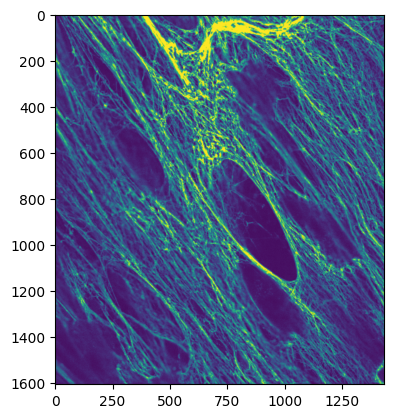

In [16]:
plt.imshow(im[0,])
plt.show()

### Run AFT
Note that this might need to be run over time

In [25]:
# AFT parameters

#### required parameters ####
window_size = 100
overlap = 0.6
neighborhood_radius = 5

#### output parameters ####
plot_overlay = False
plot_angles = False
plot_eccentricity = False
save_figures = False
data_save_path = input_folder+'output_data/'    

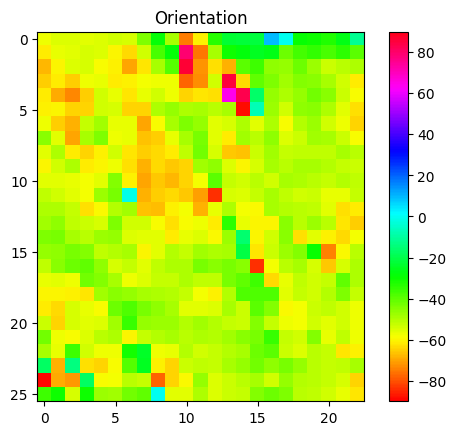

<Figure size 640x480 with 0 Axes>

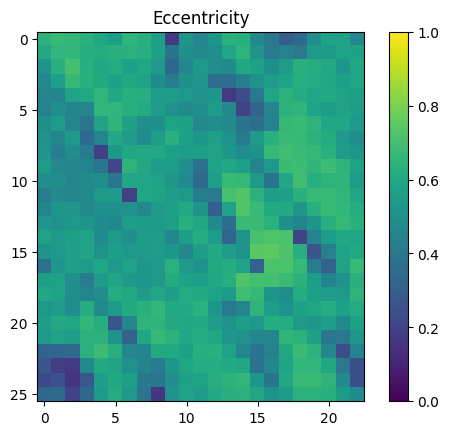

<Figure size 640x480 with 0 Axes>

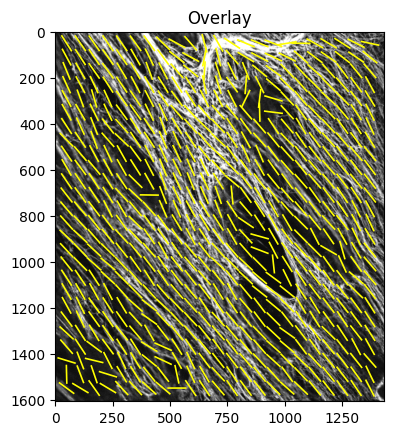

<Figure size 640x480 with 0 Axes>

In [22]:
x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(im[0,], window_size, overlap, save_path = data_save_path,
                                                             plot_overlay=plot_overlay, plot_angles=plot_angles, 
                                                             plot_eccentricity=plot_eccentricity,
                                                             save_figures=data_save_path)

In [26]:
x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(im, window_size, overlap, save_path = data_save_path,
                                                             plot_overlay=plot_overlay, plot_angles=plot_angles, 
                                                             plot_eccentricity=plot_eccentricity,
                                                             save_figures=data_save_path)

In [28]:
len(im_theta)

118

In [48]:
im_theta[16]

array([[-1.04457174, -0.95989083, -0.9433345 , -0.94495621, -0.93166605,
        -0.96252325, -0.96826252, -0.80117529, -0.55550079, -0.37984674,
        -1.37137051, -1.13092357, -0.58381914, -0.40279681, -0.43711727,
        -0.40109928,  0.0714028 , -0.16381423, -0.39996681, -0.42783617,
        -0.57252371, -0.47899968, -0.35685218],
       [-1.0838172 , -1.04060306, -0.98674446, -0.96513627, -0.9678918 ,
        -1.01921722, -1.10050841, -0.94944092, -0.7378389 , -0.51976828,
         1.35600729, -1.33966389, -0.91598156, -0.64340604, -0.50098829,
        -0.39001274, -0.40345316, -0.66711428, -0.68825867, -0.63897034,
        -0.78656361, -0.58226486, -0.67112249],
       [-1.13203322, -1.08129328, -0.9765757 , -0.95199469, -1.04889741,
        -1.01329006, -1.21111201, -1.09600682, -0.91955217, -0.67082139,
        -1.53282928, -1.3262443 , -1.00612988, -1.00576473, -0.67492541,
        -0.57033831, -0.70285778, -0.85322986, -0.73251428, -0.74914712,
        -0.92352381, -0.8825

In [46]:
y

array([  50,   50,   50,   50,   50,   50,   50,   50,   50,   50,   50,
         50,   50,   50,   50,   50,   50,   50,   50,   50,   50,   50,
         50,  110,  110,  110,  110,  110,  110,  110,  110,  110,  110,
        110,  110,  110,  110,  110,  110,  110,  110,  110,  110,  110,
        110,  110,  170,  170,  170,  170,  170,  170,  170,  170,  170,
        170,  170,  170,  170,  170,  170,  170,  170,  170,  170,  170,
        170,  170,  170,  230,  230,  230,  230,  230,  230,  230,  230,
        230,  230,  230,  230,  230,  230,  230,  230,  230,  230,  230,
        230,  230,  230,  230,  290,  290,  290,  290,  290,  290,  290,
        290,  290,  290,  290,  290,  290,  290,  290,  290,  290,  290,
        290,  290,  290,  290,  290,  350,  350,  350,  350,  350,  350,
        350,  350,  350,  350,  350,  350,  350,  350,  350,  350,  350,
        350,  350,  350,  350,  350,  350,  410,  410,  410,  410,  410,
        410,  410,  410,  410,  410,  410,  410,  4

In [34]:
26*23

598

In [35]:
len(x)

598

### Subset csv for current image

In [36]:
df.File_name.unique()

array(['siCCT8_si5_R1_Position_26_spots',
       'siCCT8_si5_R2_Position_27_spots',
       'siCCT8_si8_R1_Position_31_spots',
       'siCCT8_si8_R2_Position_33_spots', 'siCTRL_R1_Position_6_spots',
       'siCTRL_R2_Position_12_spots'], dtype=object)

In [37]:
df_subset = df.loc[df.File_name == 'siCTRL_R1_Position_6_spots']
df_subset.head()

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,PERIMETER,CIRCULARITY,SOLIDITY,SHAPE_INDEX,File_name_raw,Condition,experiment_nb,File_name,Repeat,Unique_ID
1699,ID3842,3842,0,59994.0,358.788984,464.305796,0.0,91.0,91,138.190174,...,1511.487920,0.329993,0.652224,6.170958,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1700,ID3588,3588,0,83174.0,655.321703,952.250604,0.0,40.0,40,162.715152,...,1672.325104,0.373744,0.857332,5.798528,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1701,ID3590,3590,0,84819.0,655.781933,943.489064,0.0,41.0,41,164.318703,...,1713.634716,0.362992,0.835554,5.883779,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1702,ID3846,3846,0,49197.0,352.480696,457.365264,0.0,92.0,92,125.147755,...,1273.097583,0.381489,0.714440,5.739363,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1703,ID3591,3591,0,83738.0,676.951721,975.889848,0.0,39.0,39,163.298045,...,1704.151781,0.362498,0.875368,5.887791,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0


In [39]:
trackID = 0

df_track = df_subset.loc[df_subset.TRACK_ID == trackID]
df_track.tail()

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,PERIMETER,CIRCULARITY,SOLIDITY,SHAPE_INDEX,File_name_raw,Condition,experiment_nb,File_name,Repeat,Unique_ID
1812,ID3575,3575,0,82489.0,682.790576,988.695866,0.0,38.0,38,162.029512,...,1641.109978,0.384833,0.899546,5.714374,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1813,ID3576,3576,0,77458.0,691.318671,995.937748,0.0,36.0,36,157.044985,...,1517.111590,0.423032,0.911493,5.450276,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1814,ID3833,3833,0,71040.0,374.355197,533.342281,0.0,87.0,87,150.397536,...,1672.447263,0.319254,0.743545,6.273888,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1815,ID3836,3836,0,71893.0,383.129907,516.930395,0.0,90.0,90,151.282258,...,1646.214809,0.333398,0.717388,6.139367,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1816,ID3839,3839,0,68704.0,381.718284,534.633220,0.0,88.0,88,147.897863,...,1683.916787,0.304539,0.728390,6.423678,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0


<Axes: xlabel='POSITION_X', ylabel='POSITION_Y'>

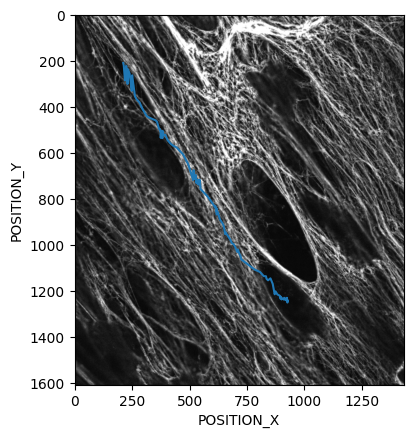

In [47]:
plt.imshow(im[0,], cmap='gray')
sns.lineplot(data=df_track, x=df_track.POSITION_X, y=df_track.POSITION_Y)

In [8]:
df.File_name.unique()

array(['siCCT8_si5_R1_Position_26_spots',
       'siCCT8_si5_R2_Position_27_spots',
       'siCCT8_si8_R1_Position_31_spots',
       'siCCT8_si8_R2_Position_33_spots', 'siCTRL_R1_Position_6_spots',
       'siCTRL_R2_Position_12_spots'], dtype=object)